In [3]:
import imageio
import requests
from functools import partial

import jax
import flax
import optax
from jax import lax
import flax.linen as nn
from flax.training import train_state, common_utils
from pathlib import Path

from jax import numpy as jnp
import numpy as np

from base64 import b64encode
from IPython.display import HTML
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


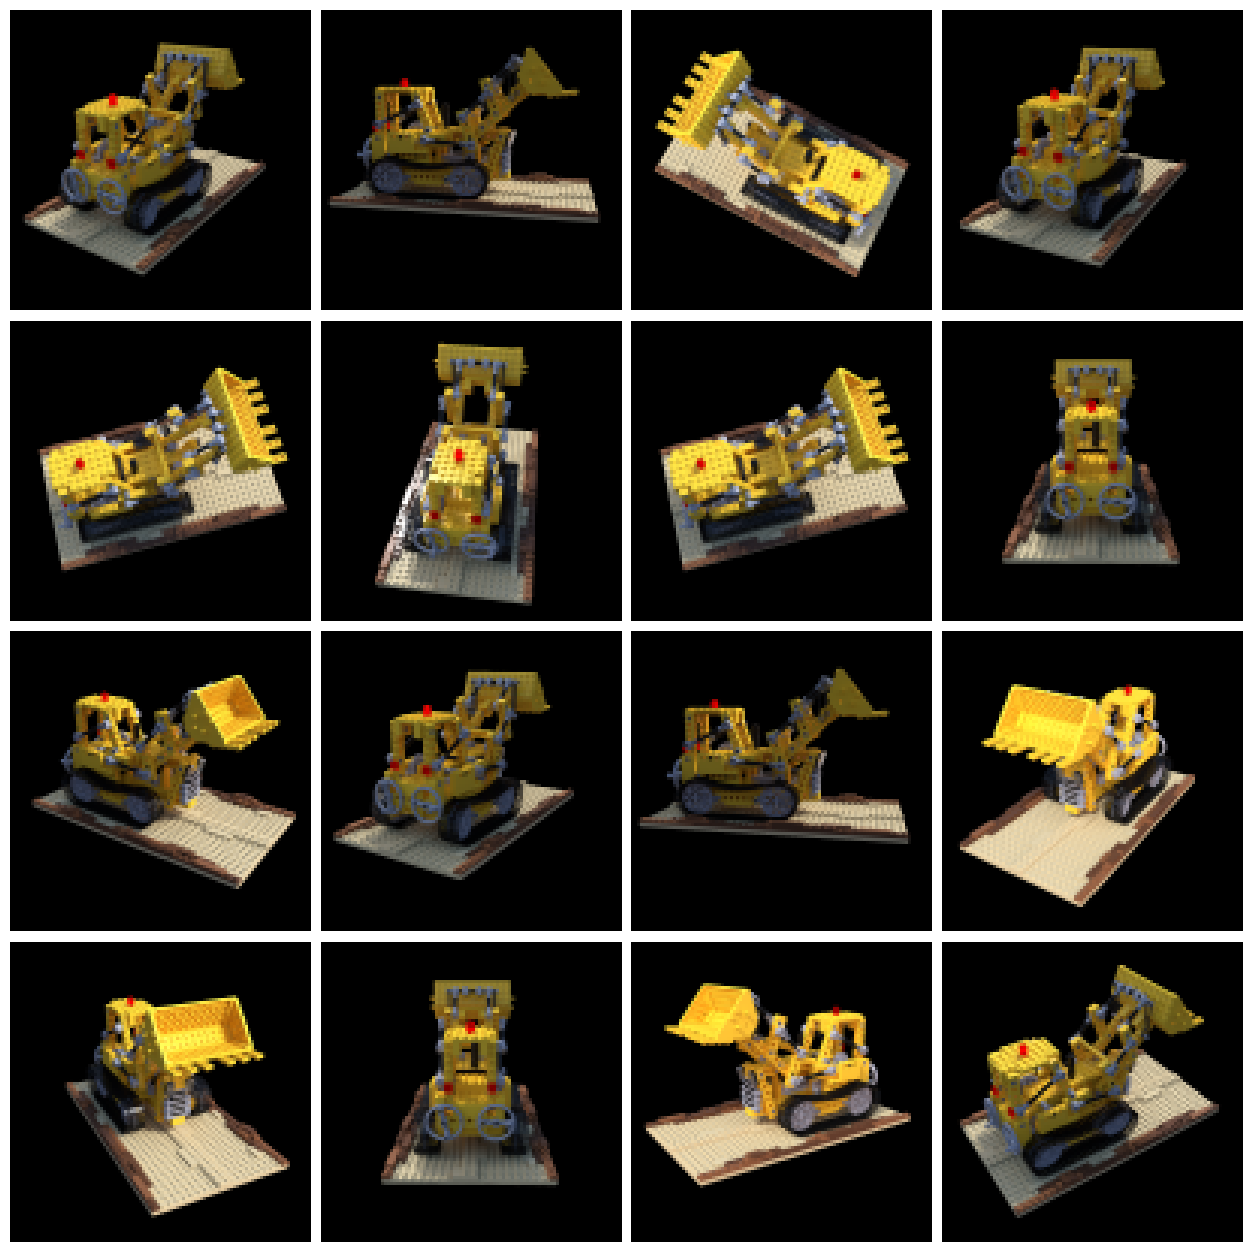

In [9]:
def get_data():
    cwd = Path.cwd()
    path = cwd.joinpath("example_data", "tiny_nerf_data.npz")
    data = np.load(path)
    images = data["images"]
    poses = data["poses"]
    focal = float(data["focal"])
    return images, poses, focal

def prep_data(train_test_split:float = 0.8):
    images, poses, focal = get_data()
    n_images, image_height, image_width, n_channels = images.shape
    split = int(train_test_split*n_images)
    
    train_images, train_poses = images[:split], poses[:split]
    # We use a single image, pose pair for validation
    val_images, val_poses = images[split:], poses[split]
    return {"train": (train_images, train_poses), "test": (val_images)}
    
    
    
    
def plot(images):
    # Visualize the training data
    fig = plt.figure(figsize=(16, 16))
    grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.1)
    random_images = images[np.random.choice(np.arange(images.shape[0]), 16)]
    for ax, image in zip(grid, random_images):
        ax.imshow(image)
        ax.axis("off")
    plt.title("Sample Images from Tiny-NeRF Data")
    plt.show()

data = prep_data()

plot(data["train"][0])

In [ ]:
from model_components.nerf_components import generate_rays, render_ray